In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data').Filter('pipkmks_m > 1.35 && pipkmks_m < 1.5')

In [4]:
# TODO: add these cuts to kinematic cuts library
reject_kstar_zero_pipkmks = 'kmpip_m < 0.8 || kmpip_m > 1.0'
reject_kstar_plus_pipkmks = 'kspip_m < 0.8 || kspip_m > 1.0'
select_kstar_zero_pipkmks = 'kmpip_m > 0.8 && kmpip_m < 1.0'
select_kstar_plus_pipkmks = 'kspip_m > 0.8 && kspip_m < 1.0'

In [7]:
hist_t_kstar_zero_selected = df_pipkmks.Filter(select_kstar_zero_pipkmks).Filter(reject_kstar_plus_pipkmks)\
    .Histo1D(('hist_t_kstar_zero_selected', '-t(p - p`) [GeV^{2}] for 1.35 < M(KK#pi) < 1.5 GeV with K*{0} Selected', 100, 0.0, 2.0), 'mand_t')

hist_t_kstar_plus_selected = df_pipkmks.Filter(select_kstar_plus_pipkmks).Filter(reject_kstar_zero_pipkmks)\
    .Histo1D(('hist_t_kstar_zero_selected', '-t(p - p`) [GeV^{2}] for 1.35 < M(KK#pi) < 1.5 GeV with K*{0} Selected', 100, 0.0, 2.0), 'mand_t')

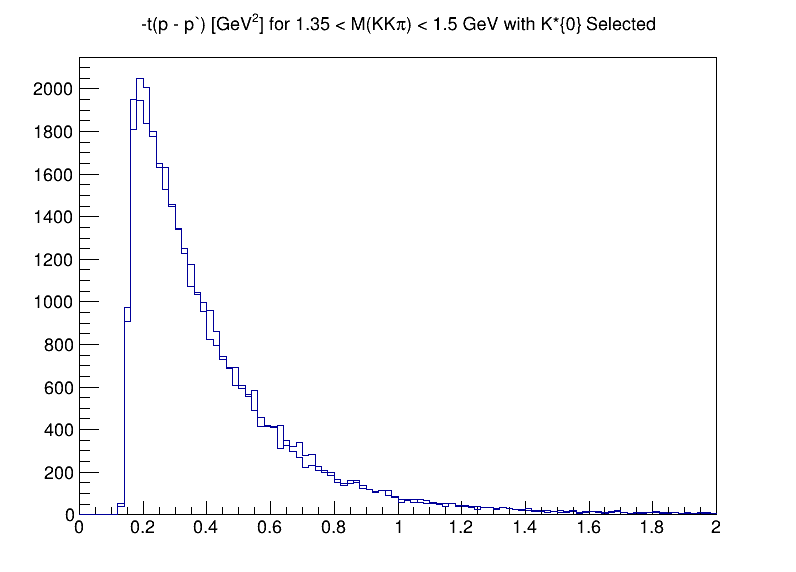

In [6]:
c = ROOT.TCanvas('c', 'c', 800, 600)
hist_t_kstar_zero_selected.Draw()
hist_t_kstar_plus_selected.Draw('same')
c.Draw()